### We use Greedy approach by initializing the start price at 0 and iterating through the array, checking the next lower price.
### Then just add the profits and return that profits

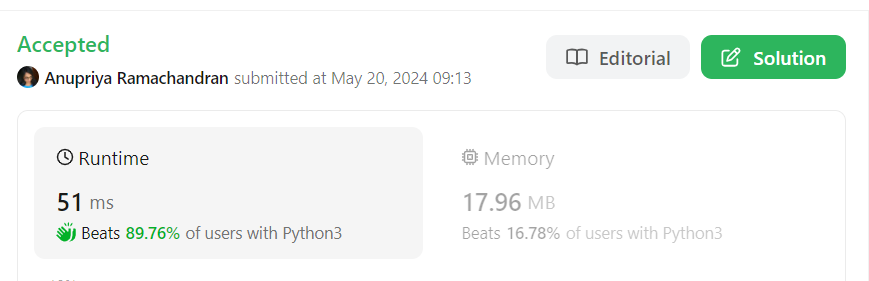

In [2]:
# Greedy Approach
from typing import List
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        start = prices[0]
        maxprofit = 0
        for i in range(len(prices)):
            if start < prices[i]:
                maxprofit += prices[i]- start
            start = prices[i]

        return maxprofit

## To Down Approach 
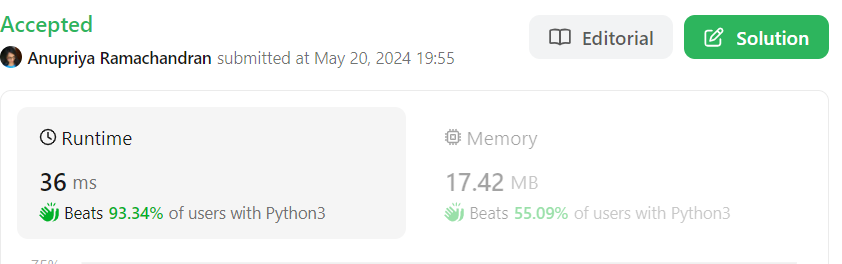

In [3]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        dp = [[-1 for _ in range(2)] for _ in range(len(prices)) ]
        return self.helper(dp, prices, 0, True)

    def helper(self, dp, prices, idx, buy):
        if idx > len(prices) -1 :
            return 0

        if dp[idx][buy] == -1:
            if buy:
                c1 = self.helper(dp, prices, idx +1, not buy) - prices[idx]
                c2 = self.helper(dp, prices, idx + 1, buy)
                dp[idx][buy]  =  max(c1, c2)
            else:
                c3 = self.helper(dp, prices, idx + 2, not buy) + prices[idx]
                c4 = self.helper(dp, prices, idx + 1, buy)
                dp[idx][buy] =  max(c3, c4)
        return dp[idx][buy]

### Tabulation : dp should have rows:  len(prices) + 2
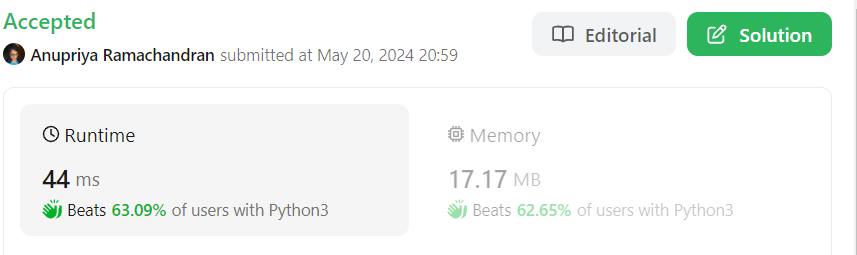

In [4]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        n = len(prices)    
        dp = [[0 for _ in range(2)]for _ in range(len(prices) + 2)]   # Size of dp increased by 2 since we have to refernce i + 2 index

        for i in range(n - 1, -1, -1):
            for j in range(2):
                if j == 1:
                    dp[i][j] = max(dp[i+1][0] - prices[i], dp[i+1][1])
                else:
                     c1 = dp[i + 2][1] + prices[i]
                     c2 = dp[i+1][0]
                     dp[i][j] = max(c1, c2)
        return dp[0][1]

## Space Optimization
<b> We can sapce optmize this, we have to use 3 variables , so i+2 => front2 and i+1 => front1 and i => cur </b>

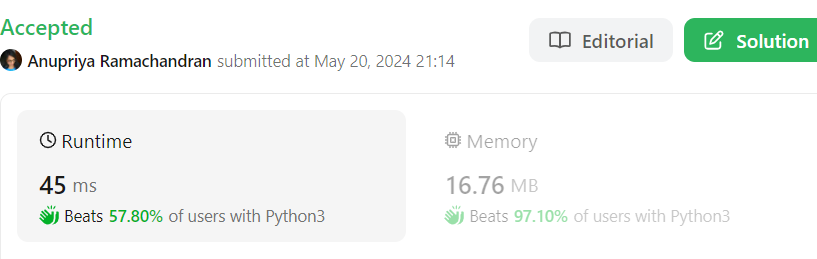

In [5]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        n = len(prices)    
        front2 = [0] * 2
        front1 = [0] * 2
        cur = [0] * 2

        for i in range(n - 1, -1, -1):
            cur[1] = max(front1[0] - prices[i], front1[1])
            cur[0] = max(front2[1] + prices[i], front1[0])

            front2 = front1[:]
            front1 = cur[:]
        return cur[1]   